In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 深入理解伯努利分布

### 伯努利分布的随机数

In [2]:
#numpy.random.binomial(n,p,size=None)

#n和p分别表示每轮试验的次数和概率
#n表示一轮中试验5次，每次中为1的概率式p，为0的概率式1-p；这轮中返回的是5次试验中为1的次数

#size指对于n此伯努利试验再进行多少次重复

#函数的返回值表示size次试验中事件分别发生的次数，size=10就返回元素数为10的列表

print(np.random.binomial(5,0.5,10))

[2 1 1 1 1 4 4 4 2 4]


### 伯努利分布的概率

In [3]:
#同时抛掷5枚硬币，5次同时正面发生的概率——采样size=100000次

print(sum(np.random.binomial(5,0.5,size=100000)==5)/100000.)

0.03115


### 伯努利分布的市场模型

In [4]:
#创建简易的市场模型
#假设市场为处于涨跌随机波动的短线交易市场，可以不分昼夜交易，且无手续费
#初始资金是1000元，每次用1%仓位随机买入9值股票
#如果有一半以上的股票涨了，则赚一倍投入的钱
#如果有一半以上的股票跌了，投入的前就全部亏损，即赔率为1赔1

#ply_cnt：为测试的次数
#stock_num：为买入的股票数
#position：为买次买入的仓位
#commmission：为手续费
#lever：为加注标志
def simpmarket(win_rate,play_cnt=1000,stock_num=9,position=0.01,commission=0.01,lever=False):
    my_money=np.zeros(play_cnt)
    my_money[0]=1000
    #lose_count表示亏损的次数
    lose_count=1
    #假设每只股票涨跌概率符合伯努利分布
    binomial=np.random.binomial(stock_num,win_rate,play_cnt)
    for i in range(1,play_cnt):
        if my_money[i-1]*position*lose_count<=my_money[i-1]:  #资金充足
            #once_chip每次买入的钱数为用剩余钱的1%买入股票
            once_chip=my_money[i-1]*position*lose_count
        else:
            #没钱投了结束
            print(my_money[i-1])
            break
        #测试的第i次中有一半以上的股票上涨，那么就认为赚了一倍投入的钱
        if binomial[i]>stock_num//2:  #一半以上股票上涨
            #如果lever==False，不加注
            #如果lever==True，加注
            my_money[i]=my_money[i-1]+once_chip if lever==False else my_money[i-1]+once_chip*lose_count
            lose_count=1
        #测试的第i次没有一半以上的股票上涨，投入的钱全部亏损，亏损的次数加1；
        #第i次的钱剩余的钱=第i-1次剩余的钱-第i次投入的钱
        else:
            my_money[i]=my_money[i-1]-once_chip if lever==False else my_money[i-1]-once_chip*lose_count
            lose_count+=1
        #扣去手续费
        my_money[i]-=commission
        #如果亏光了，就没钱再投了，直接结束
        if my_money[i]<=0:
            break
    return my_money

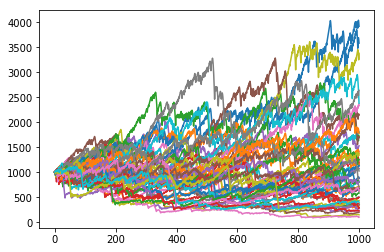

In [5]:
#50人参与，无手续费 参加1000次
trader=50

#资金变化曲线，横坐标为参与的拘束，纵坐标表示资金的变化情况
_=[plt.plot(np.arange(1000),simpmarket(0.5,play_cnt=1000,stock_num=9,commission=0)) for _ in np.arange(0,trader)]

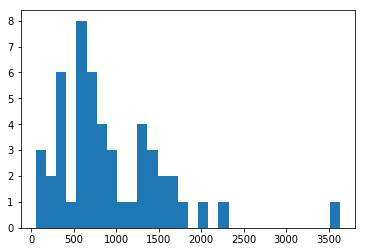

In [6]:
#[simpmarket(0.5,play_cnt=1000,stock_num=9,commission=0)[-1] 为最终的剩余资金
#纵坐标为分布的剩余资金所对应的人数
_=plt.hist([simpmarket(0.5,play_cnt=1000,stock_num=9,commission=0)[-1] for _ in np.arange(0,trader)],bins=30)

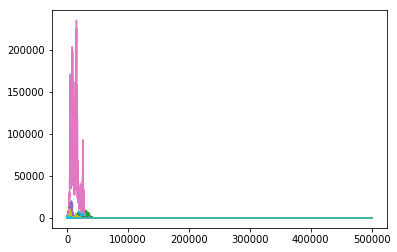

In [7]:
#50人参与，手续费0.01,参加50000次
#可以看到此策略最后都亏损
trader=50
_=[plt.plot(np.arange(500000),simpmarket(0.5,play_cnt=500000,stock_num=9,commission=0)) for _ in np.arange(0,trader)]

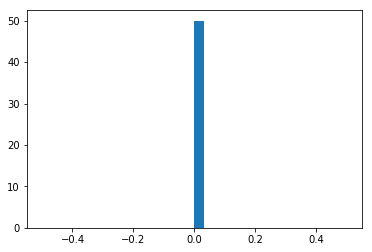

In [8]:
_=plt.hist([simpmarket(0.5,play_cnt=50000,stock_num=9,commission=0.01)[-1] for _ in np.arange(0,trader)],bins=30)

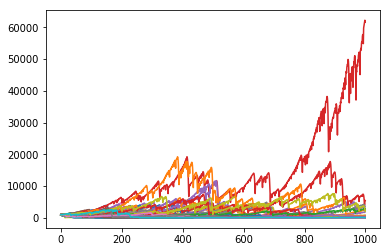

In [9]:
#假定每亏损一次，下一次加注一倍筹码
trader=50
_=[plt.plot(np.arange(1000),simpmarket(0.5,play_cnt=1000,stock_num=9,commission=0,lever=True)) for _ in np.arange(0,trader)]

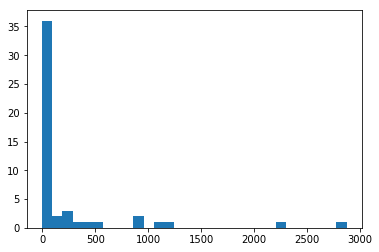

In [10]:
_=plt.hist([simpmarket(0.5,play_cnt=1000,stock_num=9,commission=0,lever=True)[-1] for _ in np.arange(0,trader)],bins=30)